<img src='https://mundiwebservices.com/build/assets/Mundi-Logo-CMYK-colors.png'  align='left' width='15%' ></img>  

# Mundi Web Map Tile Service (WMTS)

In [1]:
from mundilib import MundiCatalogue

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

### Service end point - identification

In [3]:
c = MundiCatalogue()
wmts = c.get_collection("Sentinel2").mundi_wmts('L1C')

In [4]:
try:
    print("Type:    " + wmts.identification.type)
    print("Version: " + wmts.identification.version)
    print("Service: " + wmts.identification.title)
except Exception as e:
    print ("----- Error occured -----\n" + str(e))

Type:    WMTS
Version: 1.0.0
Service: Sentinel-2 L1C


In [5]:
wmts.identification.abstract

'The Copernicus project’s Sentinel satellites are revolutionizing earth observation (EO). Its free, full and open access to data with very short revisit times, high spatial resolution, and good spectral resolution are crucial for many applications. The portfolio of possible products is vast - use-cases of such a service range from plant health monitoring, land and water body change, flood monitoring, disaster mapping and more.However the current gap between Sentinel source data and its end-users is large:• \x90  ESA’s complex Scientific Data Hub• \x90  raster files are compressed with JPEG2000 (13 raster filesfor each product, one per spectral band)• \x90  terabytes of data per week• \x90  additional processing requirementsTackling the data in an old-fashioned way -  offering individual derivative products simply does not work anymore, the associated time and costs are large and defeat most of the major benefits of the Sentinel project.Our approach combines cloud-based GIS technologies

#### Available layers ('FeatureTypes' list) with their attributes

In [6]:
# available layers and attributes
layers = list(wmts.contents)
for lay in layers:
    print (wmts[lay].name + " i.e. " + "'" + wmts[lay].title + "'")

    #print (wmts[lay].queryable)
    #print (wmts[lay].children)
    #print (wmts[lay].parent.title)
    #print (wmts[lay].boundingBoxWGS84)
    #print (wmts[lay].crsOptions)
    #print (wmts[lay].styles)

09_NDVI i.e. '09_NDVI'
1_NATURAL_COL0R i.e. 'Natural color'
2_COLOR_INFRARED__VEGETATION_ i.e. 'Color Infrared (vegetation)'
3_FALSE_COLOR__URBAN_ i.e. 'False color (urban)'
4_AGRICULTURE i.e. 'Agriculture'
5_VEGETATION_INDEX i.e. 'Vegetation Index'
6_MOISTURE_INDEX i.e. 'Moisture Index'
7_GEOLOGY i.e. 'Geology'
8_BATHYMETRIC i.e. 'Bathymetric'
90_ATMOSPHERIC_PENETRATION i.e. 'Atmospheric penetration'
91_SWIR i.e. 'SWIR'
92_NDWI i.e. 'NDWI'
93-SWIR-2-11-12 i.e. 'SWIR-2,11,12'
B01 i.e. 'B01'
B02 i.e. 'B02'
B03 i.e. 'B03'
B04 i.e. 'B04'
B05 i.e. 'B05'
B06 i.e. 'B06'
B07 i.e. 'B07'
B08 i.e. 'B08'
B09 i.e. 'B09'
B10 i.e. 'B10'
B11 i.e. 'B11'
B12 i.e. 'B12'
B8A i.e. 'B8A'


#### Available operations with offered output format

In [7]:
#[op.name for op in wmts.operations]
for op in wmts.operations:
    print (op.name + str(wmts.getOperationByName(op.name).methods))
    
    try :
        for fm in wmts.getOperationByName(op.name).formatOptions:
            print ("\t" + fm)
        print ("")
    
    except Exception as e:
        print ("\n----- Error occured -----\n" + str(e) + "\n")

GetCapabilities[{'constraints': [Constraint: GetEncoding - ['KVP']], 'type': 'Get', 'url': 'http://shservices.mundiwebservices.com/ogc/wmts/d275ef59-3f26-4466-9a60-ff837e572144?'}]
	text/xml

GetTile[{'constraints': [Constraint: GetEncoding - ['KVP']], 'type': 'Get', 'url': 'http://shservices.mundiwebservices.com/ogc/wmts/d275ef59-3f26-4466-9a60-ff837e572144?'}]
	text/xml



### Usage

#### GetTile: Visualisation of all WMTS layers from bbox

09_NDVI


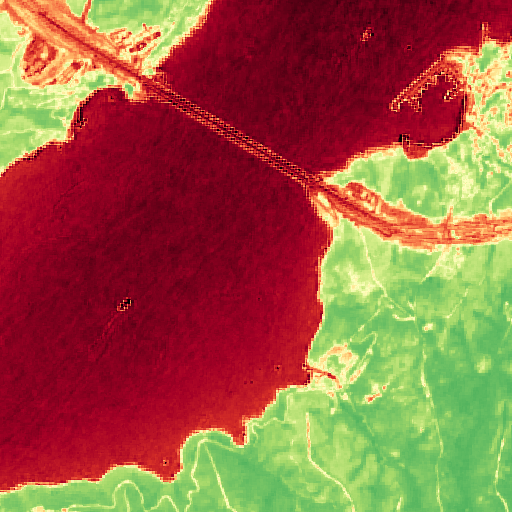


Natural color


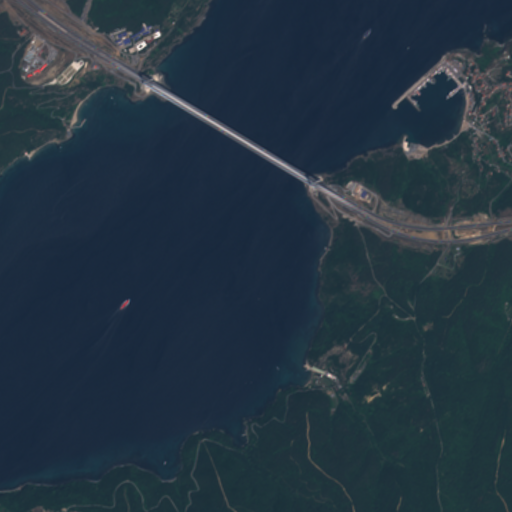


Color Infrared (vegetation)


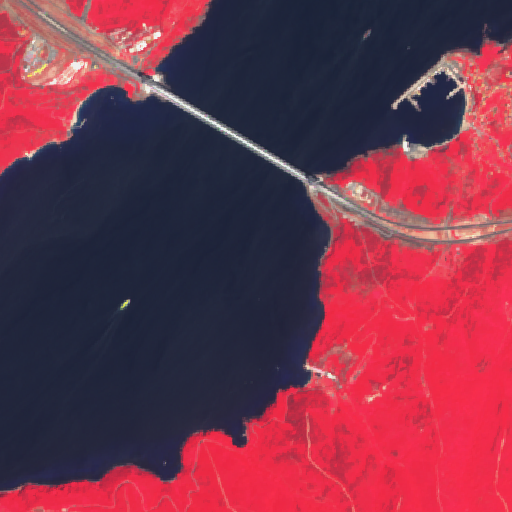


False color (urban)


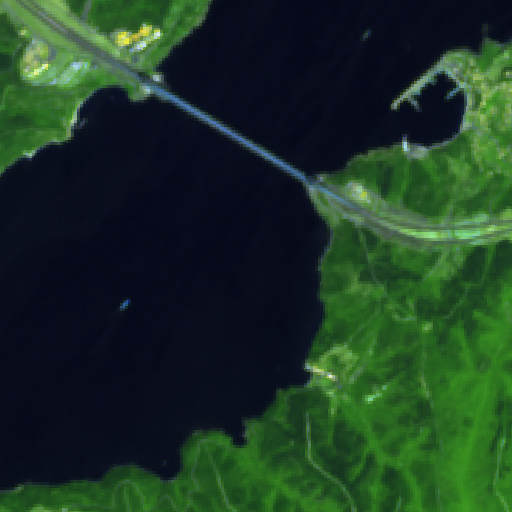


Agriculture


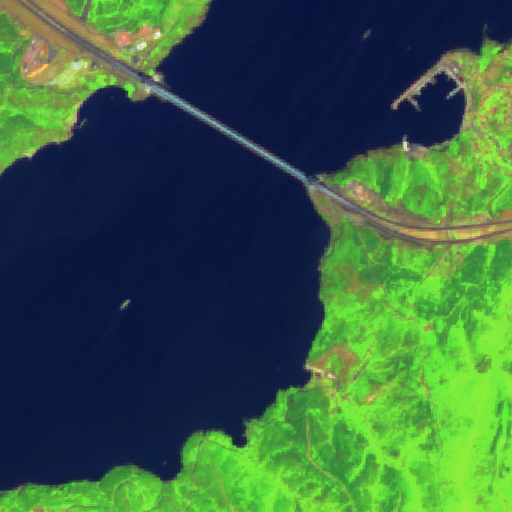


Vegetation Index


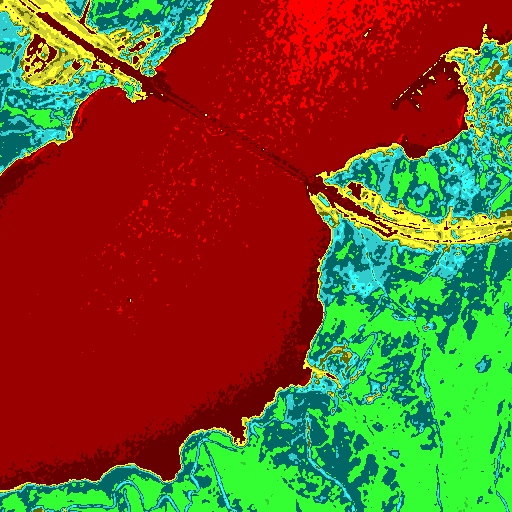


Moisture Index


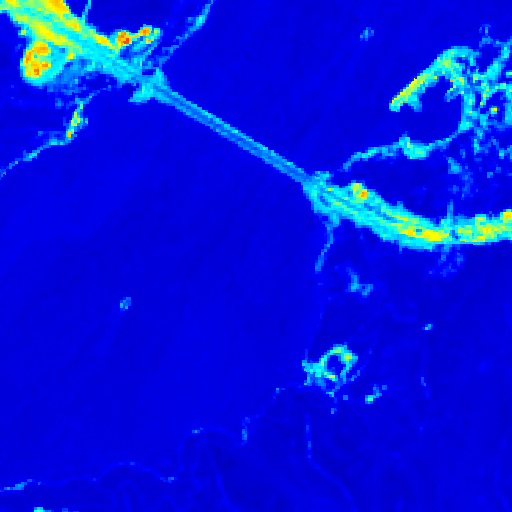


Geology


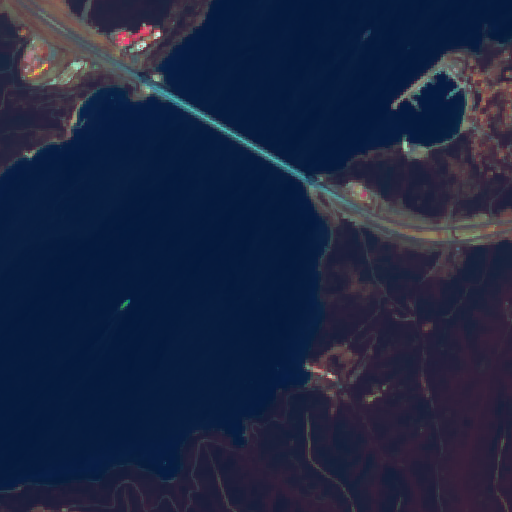


Bathymetric


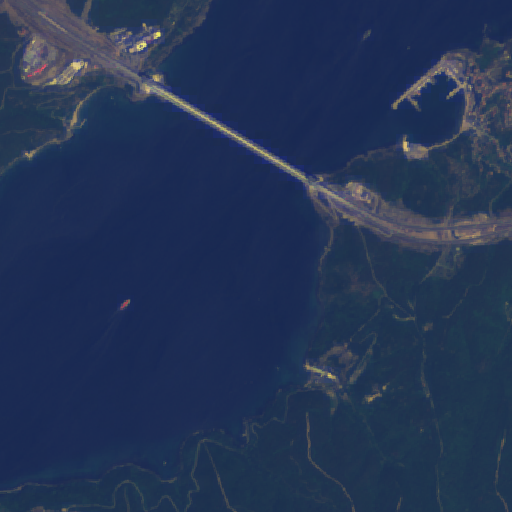


Atmospheric penetration


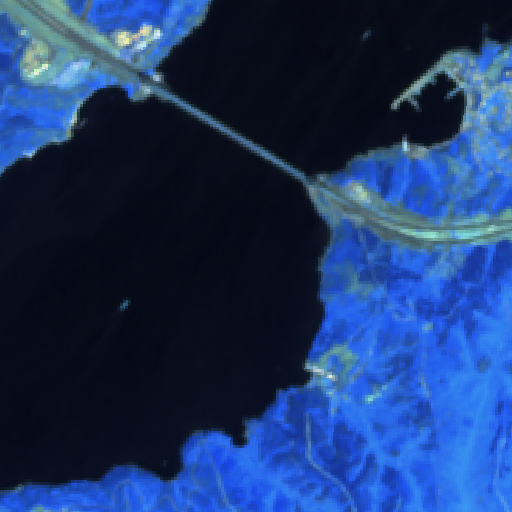


SWIR


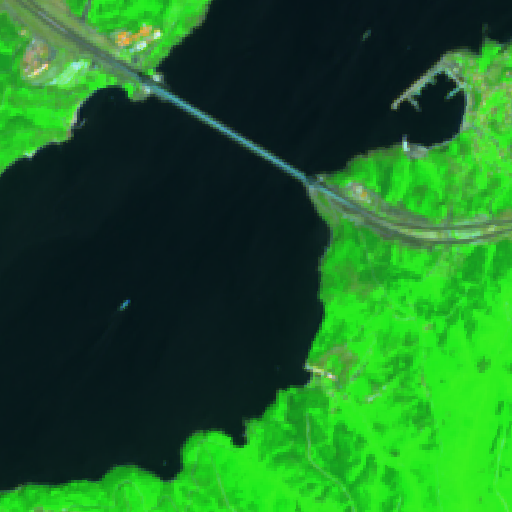


NDWI


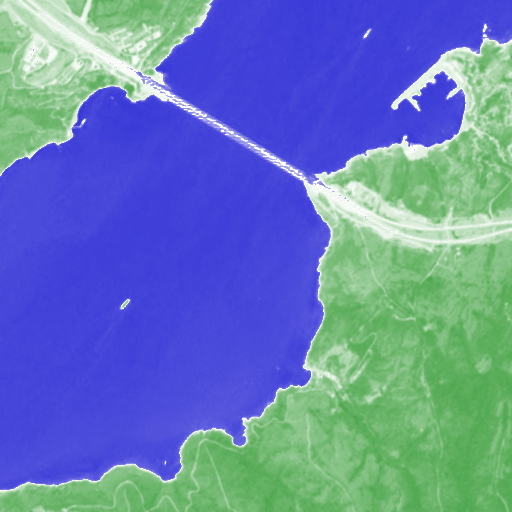


SWIR-2,11,12


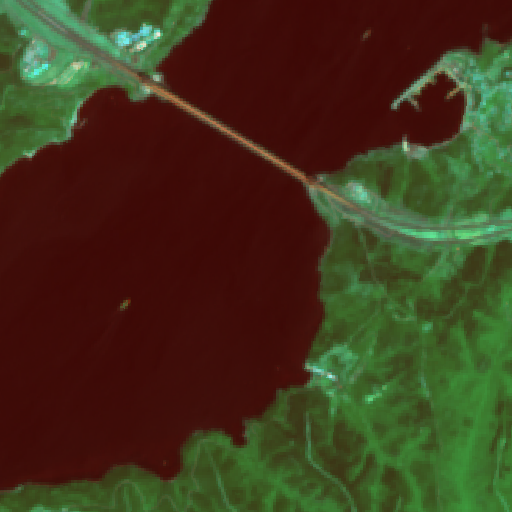


B01


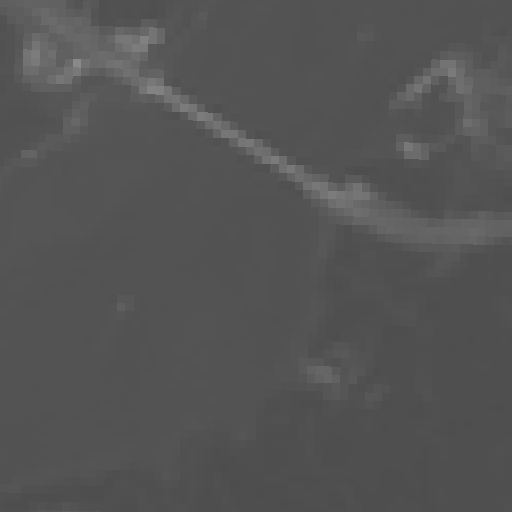


B02


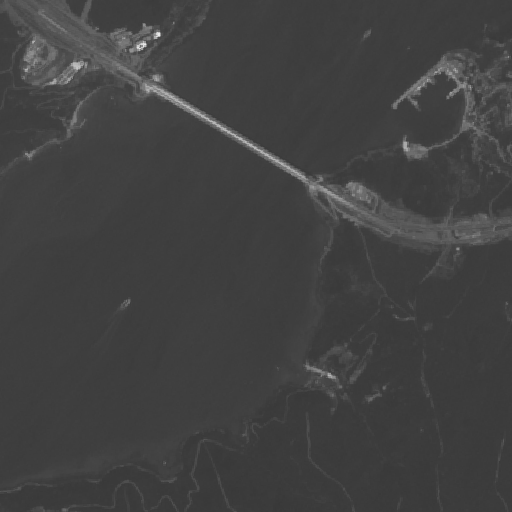


B03


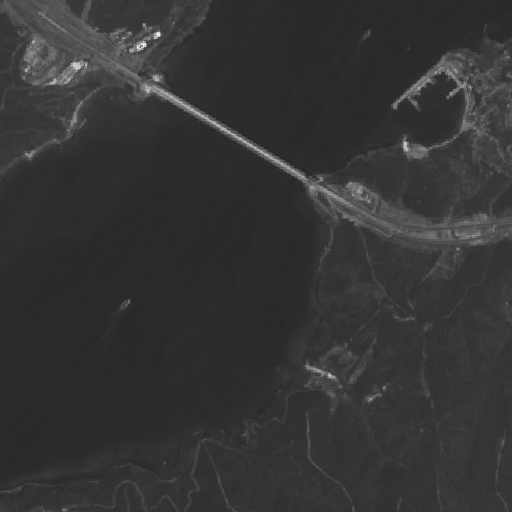


B04


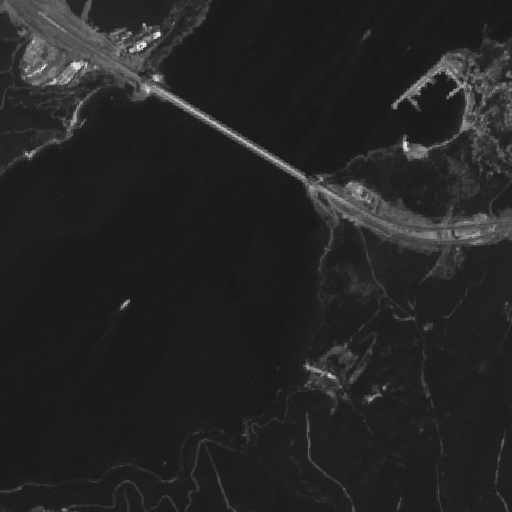


B05


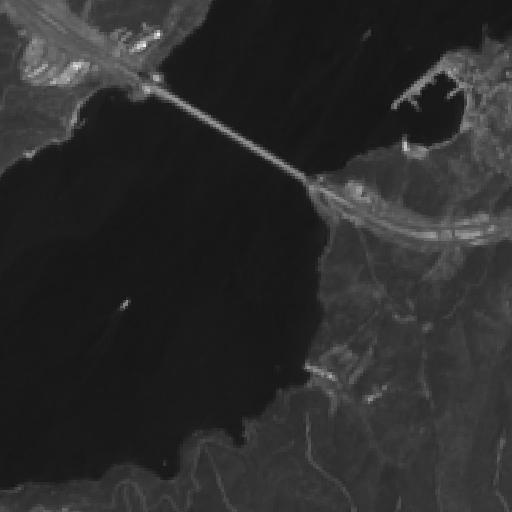


B06


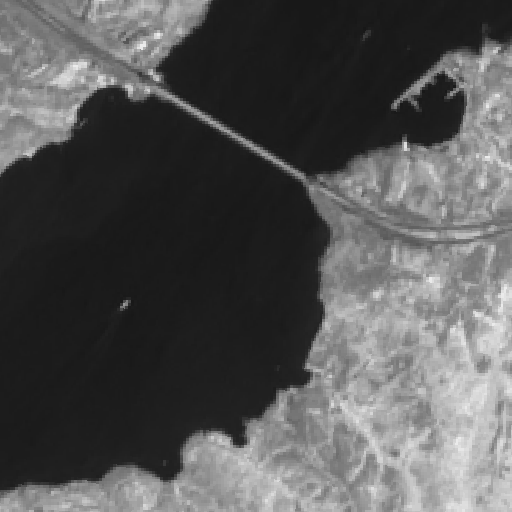


B07


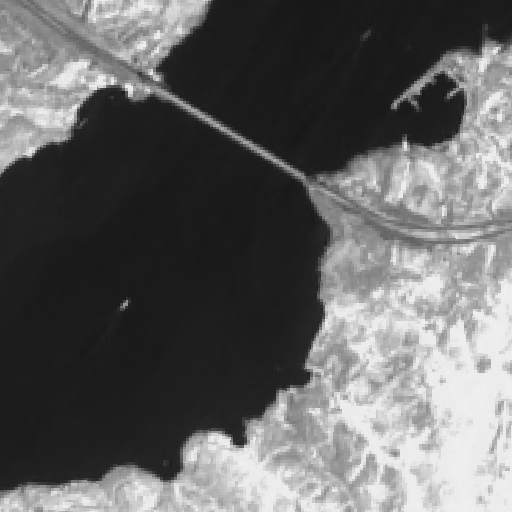


B08


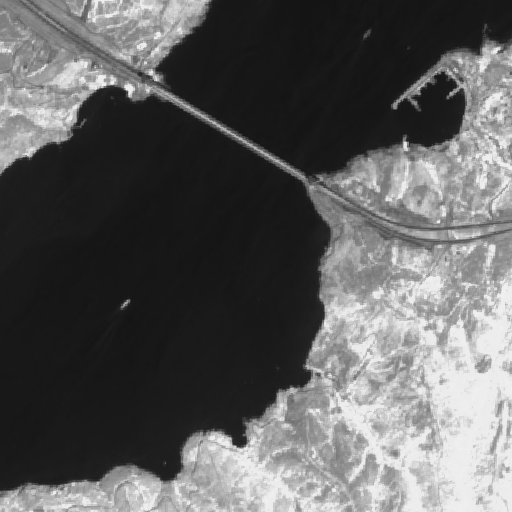


B09


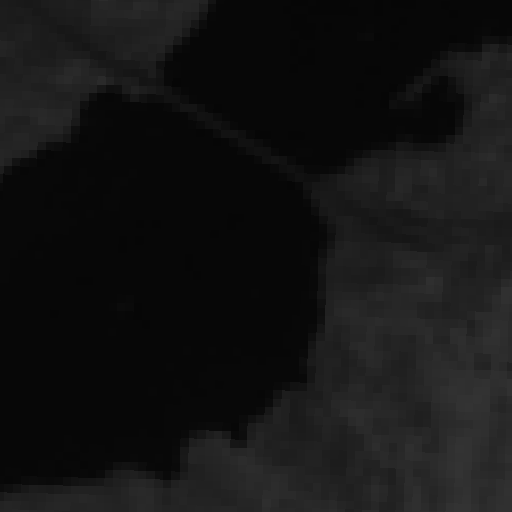


B10


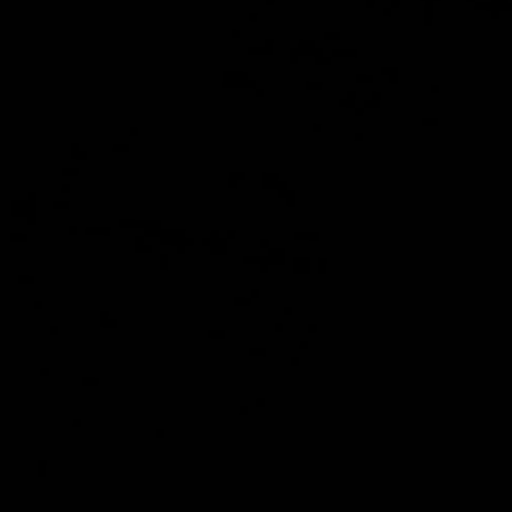


B11


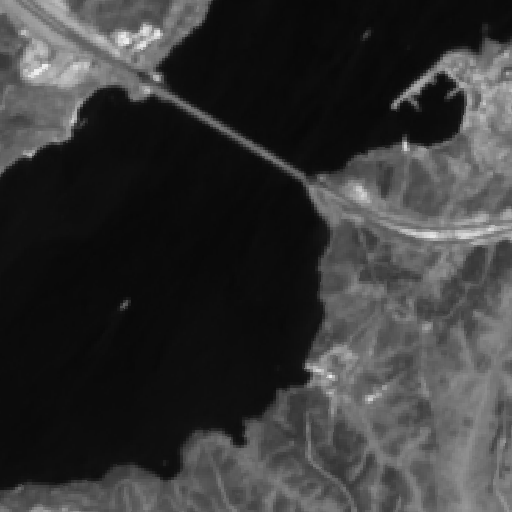


B12


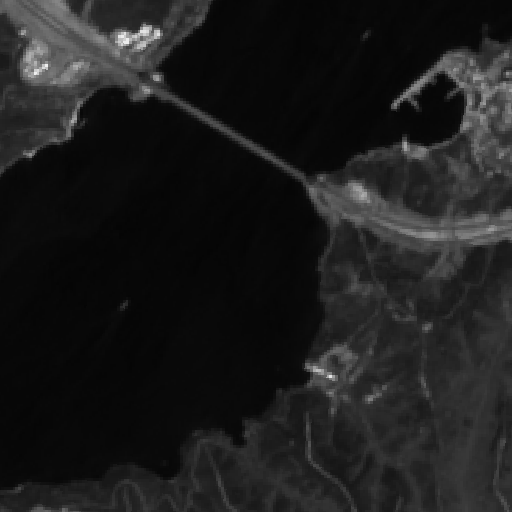


B8A


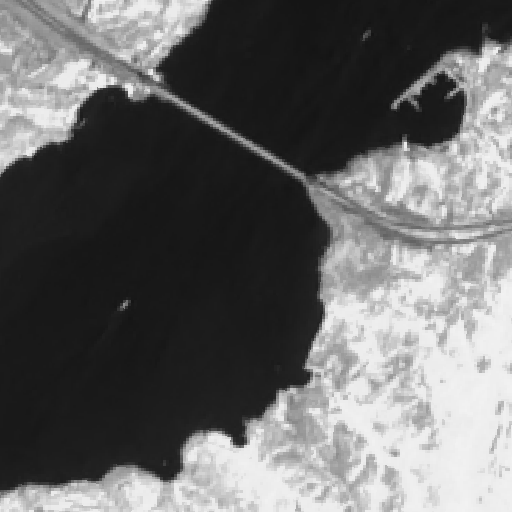

In [8]:
layers = list(wmts.contents)
   
for lay in layers:

    print (wmts[lay].title)

    response = wmts.gettile(layer=wmts[lay].name,
                                   tilematrixset='PopularWebMercator512',
                                   tilematrix='14',
                                   showlogo=False,
                                   row=3065, 
                                   time='2022-09-01',
                                   column=4758)

    #Open image
    #img = Image.open(response)
    
    # Embedded plot - Display image
    #plt.axis('off')
    #plt.title(str(wmts[lay].name))
    #plt.imshow(img)

    # Writing image
    #path = 'output_tiles/' + wmts[lay].name + '.png'
    #out = open(path, 'wb')     
    #out.write(response.read())
    #out.close()

    display(Image.open(response))
    
    print ("")
